In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,AveragePooling2D
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
dataset_dir = 'dataset_images_03s_128x128'

labels = ("Electronic", "Experimental", "Folk", "Hip-Hop", "Instrumental", "International", "Pop", "Rock")

data = tf.keras.utils.image_dataset_from_directory(dataset_dir,batch_size=16,image_size=(128,128))
data_generator = data.as_numpy_iterator()
batch = data_generator.next()

Found 79940 files belonging to 8 classes.


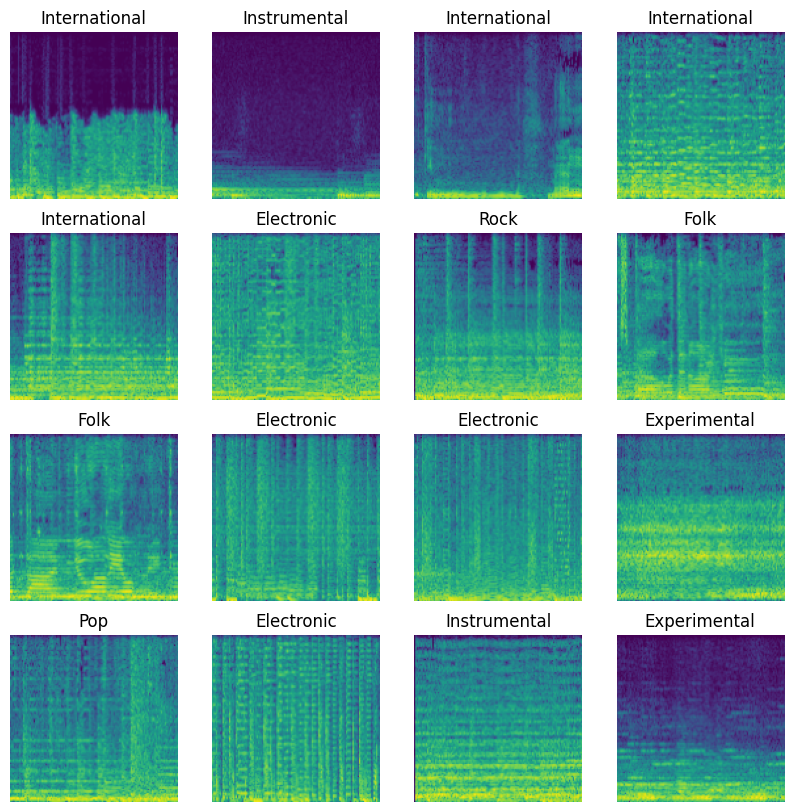

In [23]:
images, cls = batch
plt.figure(figsize=(10, 10))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(labels[cls[i]])
    plt.axis("off")
plt.show()

In [24]:
data_processed = data.map(lambda x,y: (x/255, tf.one_hot(y,depth=8)))
data_processed.as_numpy_iterator().next()

train_dataset_size = int(len(data_processed) * 0.7)
validation_dataset_size = int(len(data_processed) * 0.2)
test_dataset_size = int(len(data_processed) * 0.1)

train_dataset = data_processed.take(train_dataset_size)
validation_dataset = data_processed.skip(train_dataset_size).take(validation_dataset_size)
test_dataset = data_processed.skip(train_dataset_size + validation_dataset_size).take(test_dataset_size)

In [35]:
CNN = Sequential()

input_shape = (128,128,1)
dropout_rate = 0.5

CNN.add(Conv2D(32, (7,7), input_shape=input_shape,activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(AveragePooling2D(pool_size=(2,2)))

CNN.add(Conv2D(64, (7,7), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(AveragePooling2D(pool_size=(2,2)))

CNN.add(Conv2D(128, (7,7), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(256, (7,7), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(512, (5,5), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten())

CNN.add(Dense(1024,activation='relu'))
CNN.add(BatchNormalization())
CNN.add(Dropout(dropout_rate))

CNN.add(Dense(256, activation='relu'))
CNN.add(BatchNormalization())
CNN.add(Dropout(dropout_rate))

CNN.add(Dense(8,activation='softmax'))

CNN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      1600      
                                                                 
 batch_normalization_37 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 64, 64, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        100416    
                                                                 
 batch_normalization_38 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                      

In [36]:
CNN.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
history = CNN.fit(train_dataset, epochs=50, validation_data=validation_dataset)

Epoch 1/50
3497/3497 [==============================] - 483s 132ms/step - loss: 1.9213 - accuracy: 0.3112 - val_loss: 1.7904 - val_accuracy: 0.3328
Epoch 2/50
3497/3497 [==============================] - 454s 130ms/step - loss: 1.6008 - accuracy: 0.4281 - val_loss: 1.9077 - val_accuracy: 0.3356
Epoch 3/50
3497/3497 [==============================] - 452s 129ms/step - loss: 1.4959 - accuracy: 0.4718 - val_loss: 1.4618 - val_accuracy: 0.4858
Epoch 4/50
3497/3497 [==============================] - 436s 125ms/step - loss: 1.4227 - accuracy: 0.5038 - val_loss: 1.3700 - val_accuracy: 0.5236
Epoch 5/50
3497/3497 [==============================] - 462s 132ms/step - loss: 1.4184 - accuracy: 0.5027 - val_loss: 1.4229 - val_accuracy: 0.4971
Epoch 6/50
3497/3497 [==============================] - 468s 134ms/step - loss: 1.3295 - accuracy: 0.5336 - val_loss: 1.4231 - val_accuracy: 0.4937
Epoch 7/50
3497/3497 [==============================] - 474s 135ms/step - loss: 1.2240 - accuracy: 0.5743 - val_

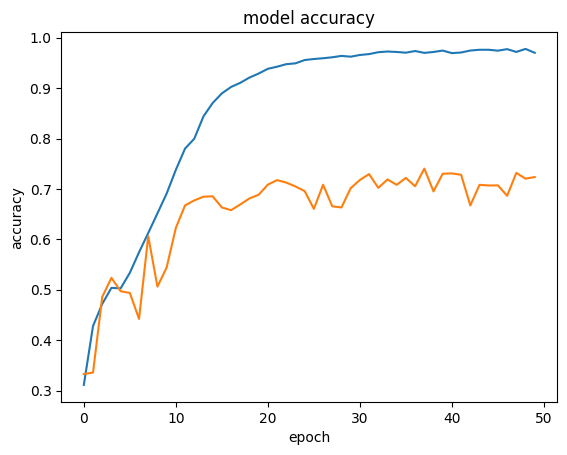

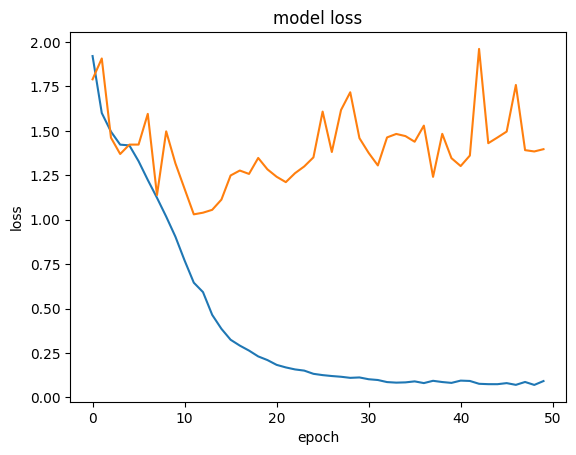

In [40]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [42]:
CNN.save('spectrogram_classifier_v01.h5', include_optimizer=True)

In [44]:
predicted_labels = []
batch = test_dataset.as_numpy_iterator().next()
test_images, test_labels = batch
predictions = CNN.predict(test_images)

1/1 [==============================] - 0s 337ms/step


In [1]:
predictions

NameError: name 'predictions' is not defined